<a href="https://colab.research.google.com/github/vinayp1120/FIRE_DETECTION/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cleaning the data and Preprocessing the data

In [1]:
!mv AmesHousing.csv /content/drive/MyDrive

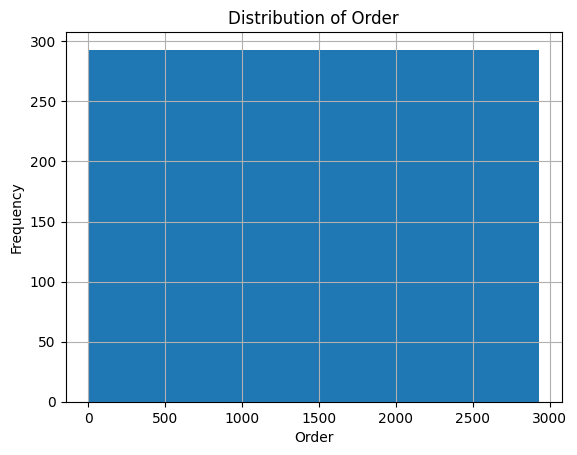

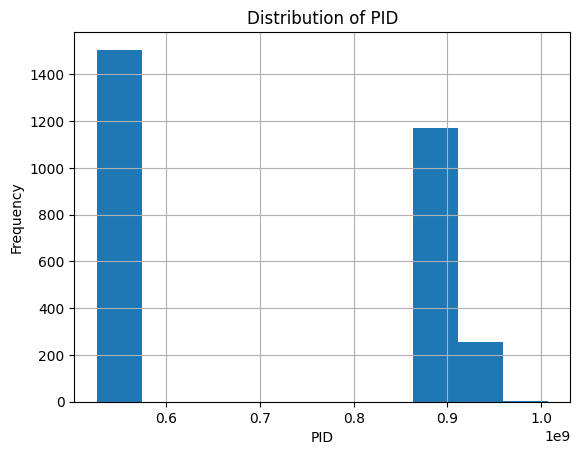

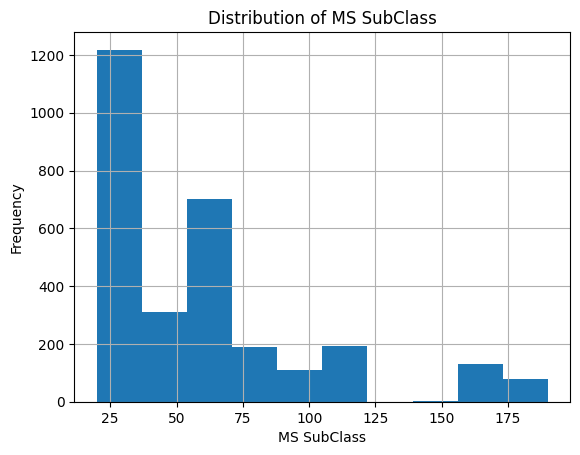

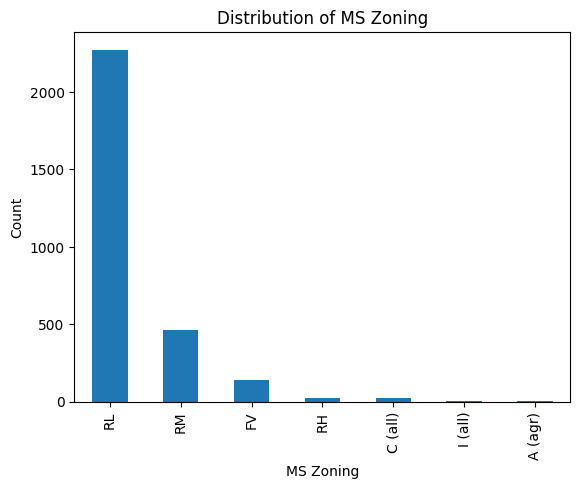

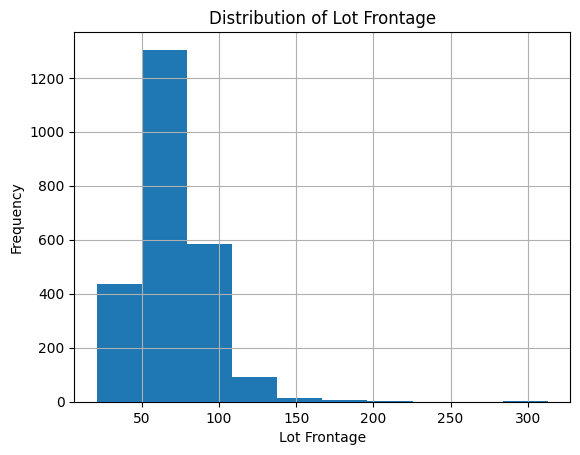

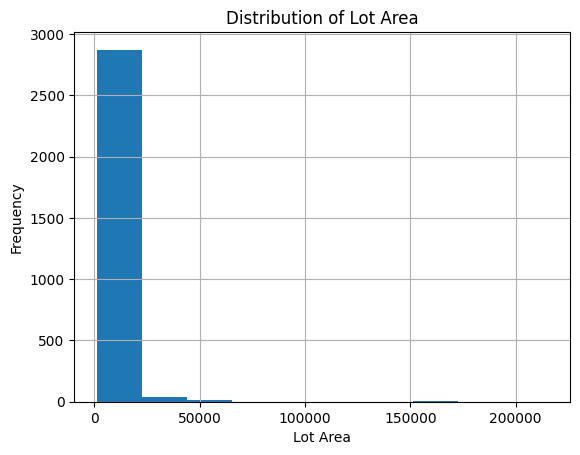

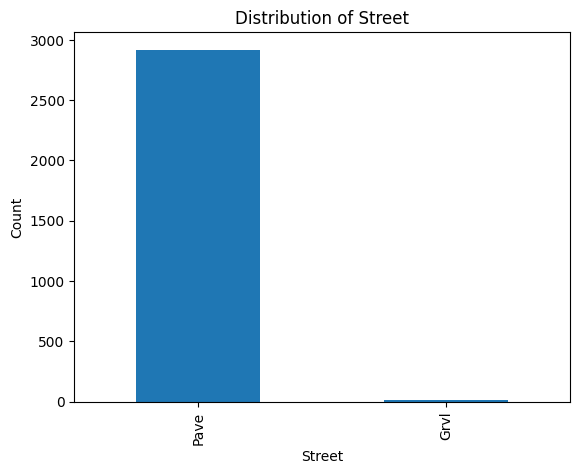

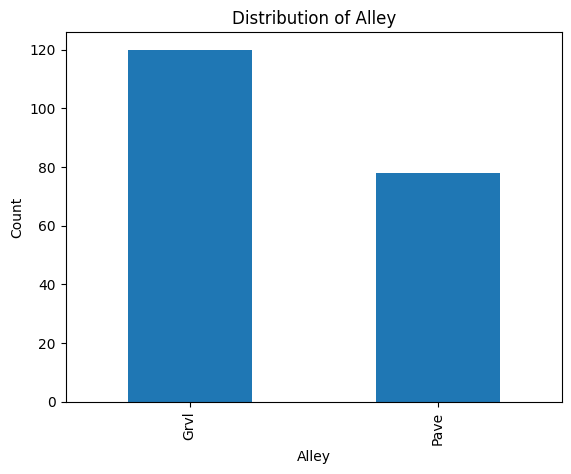

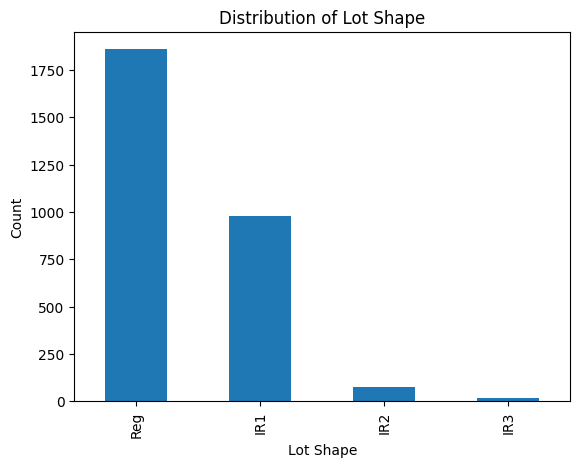

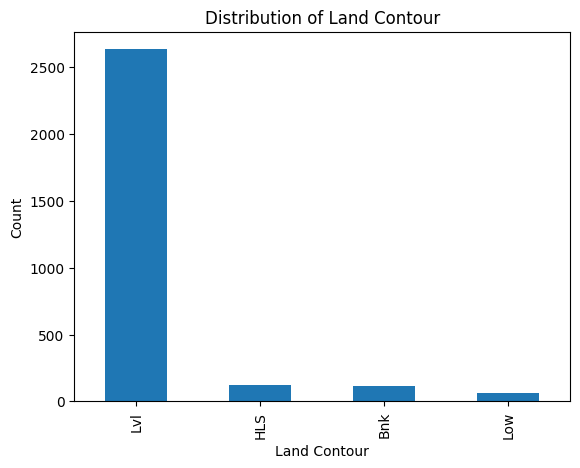

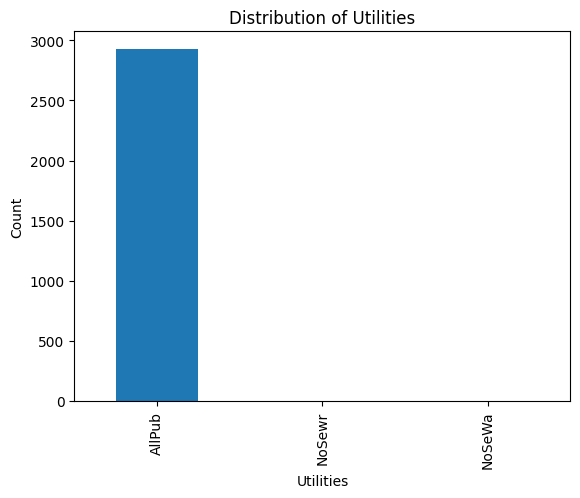

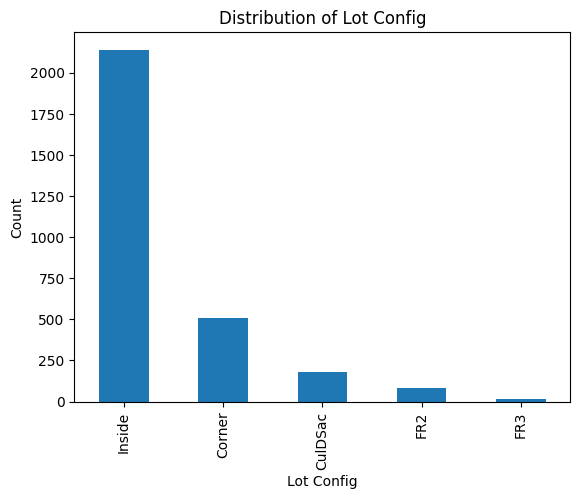

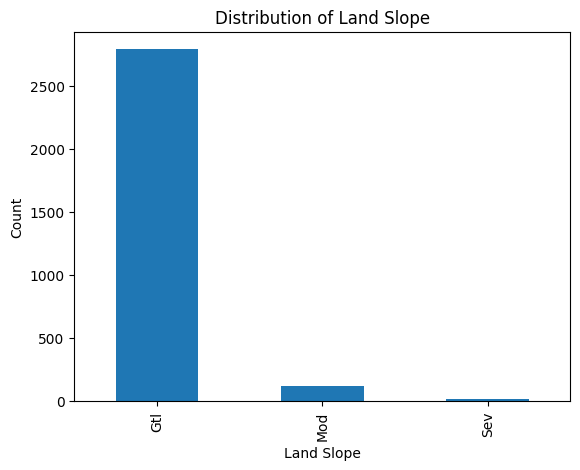

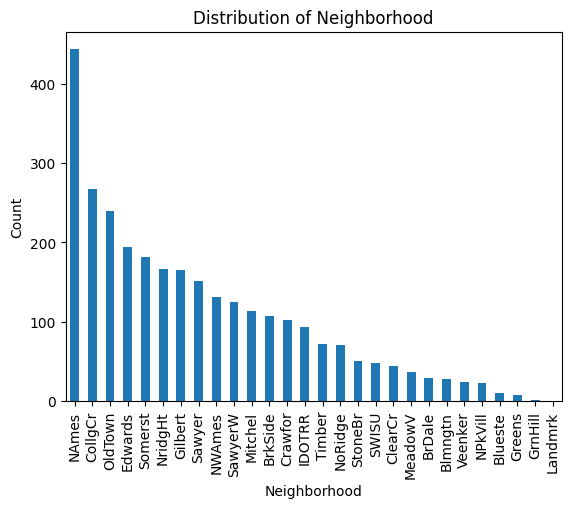

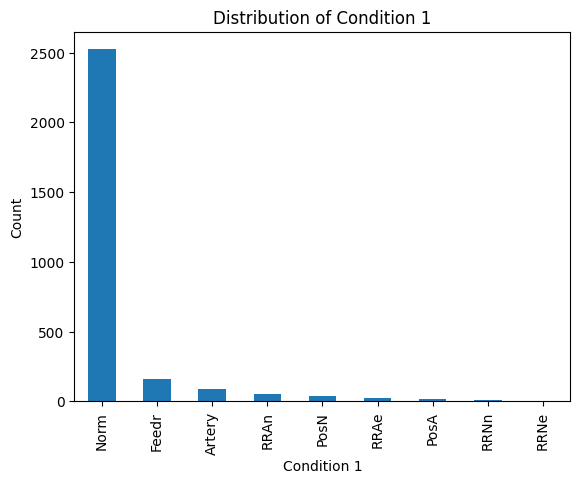

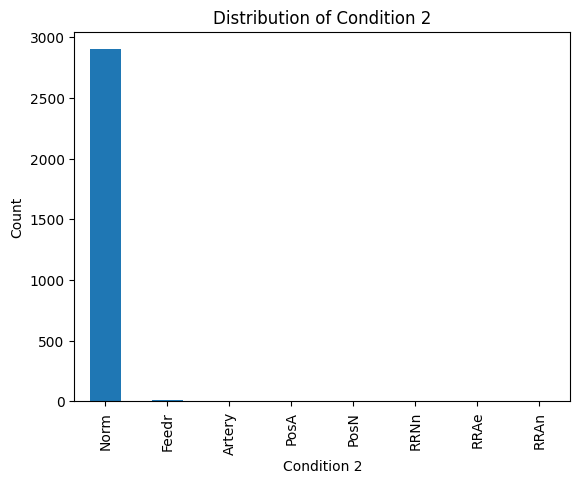

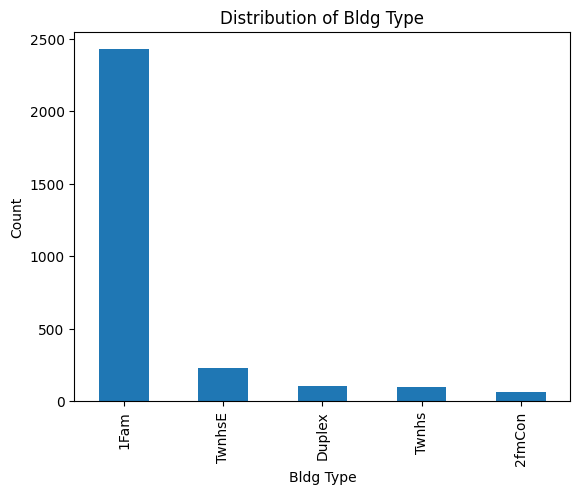

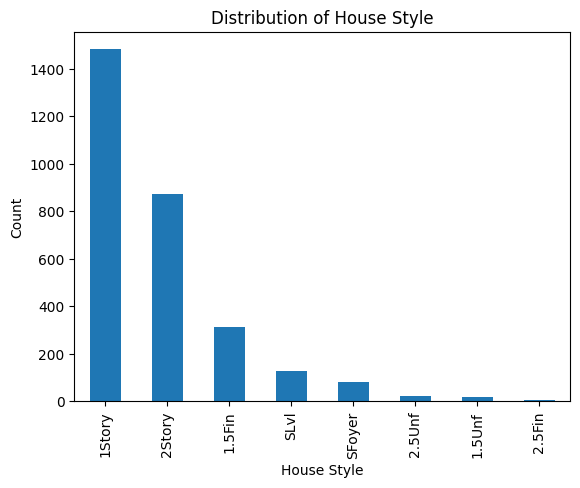

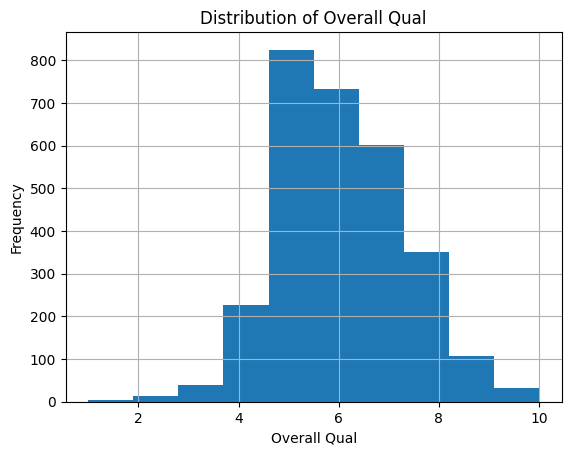

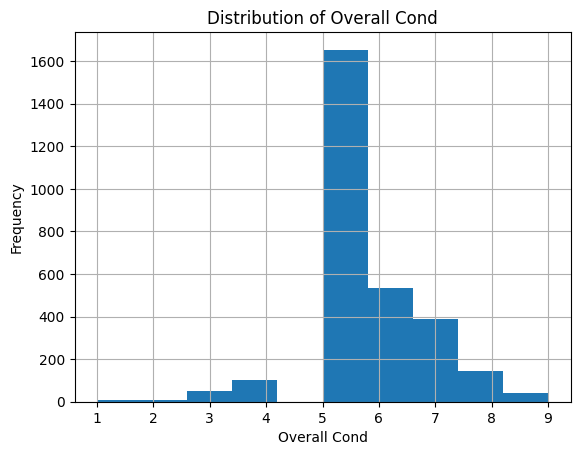

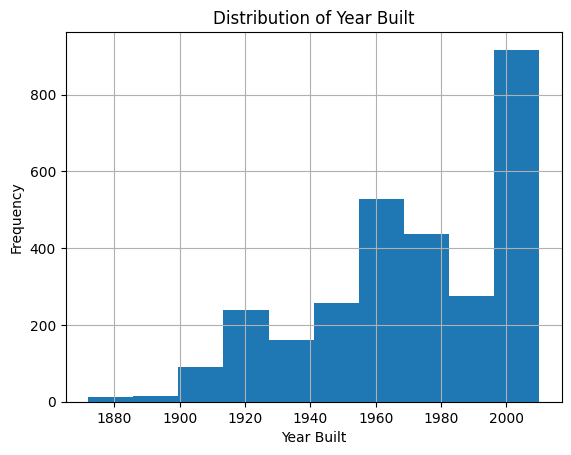

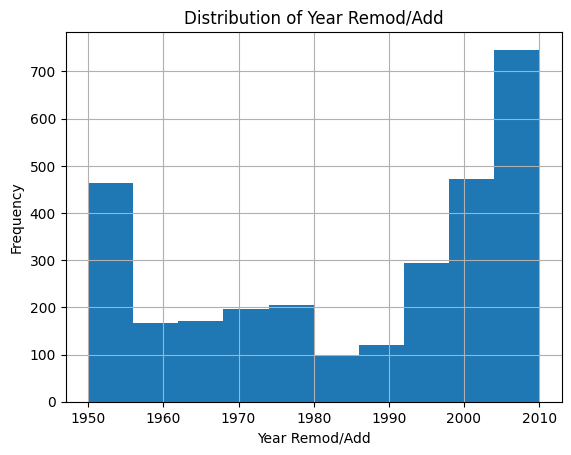

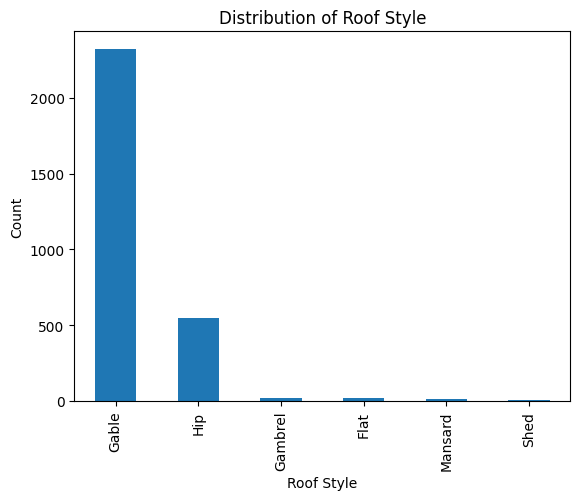

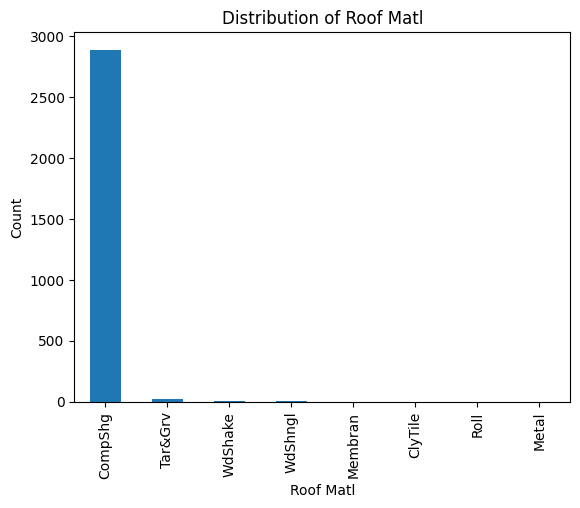

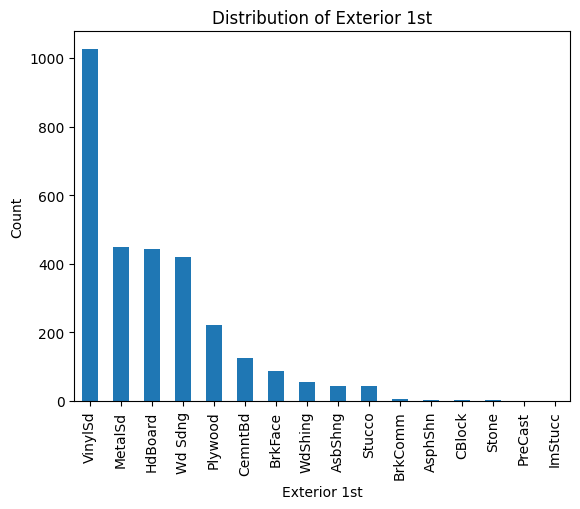

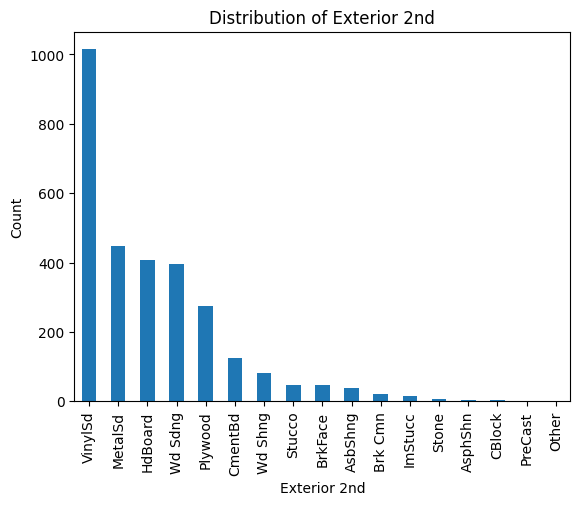

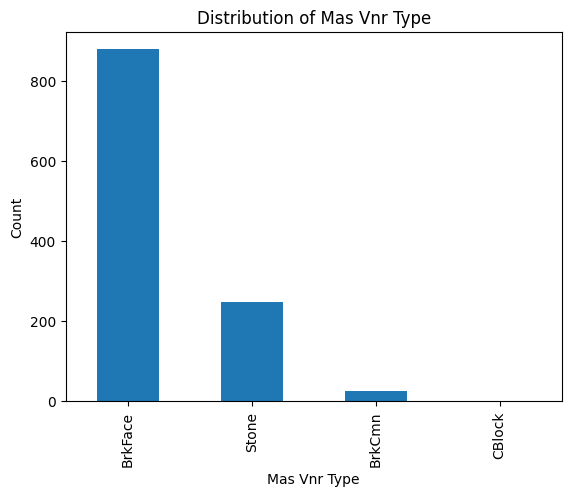

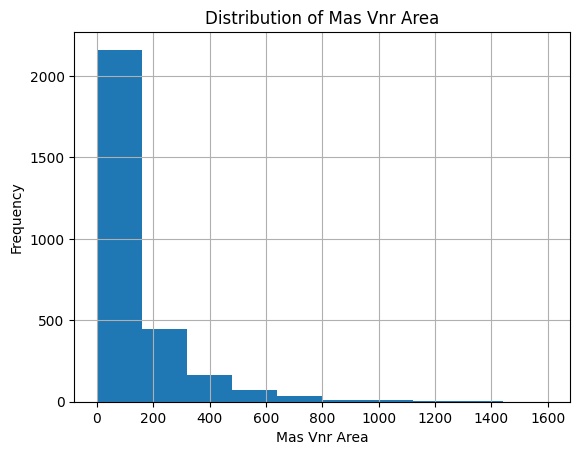

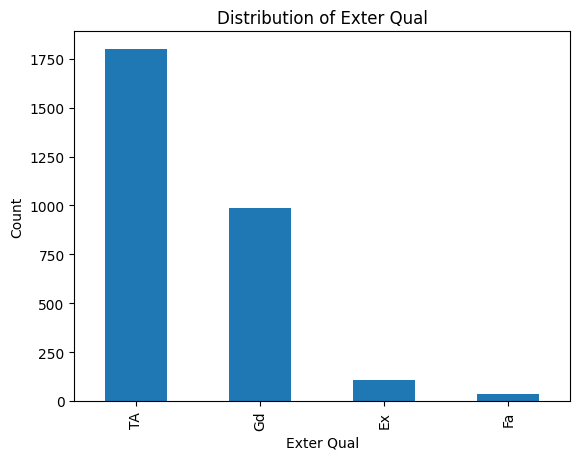

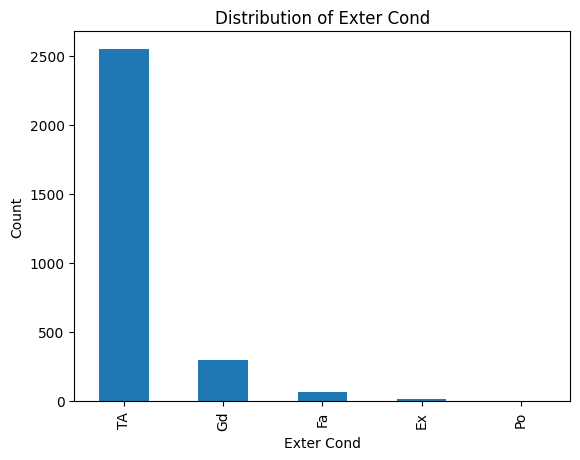

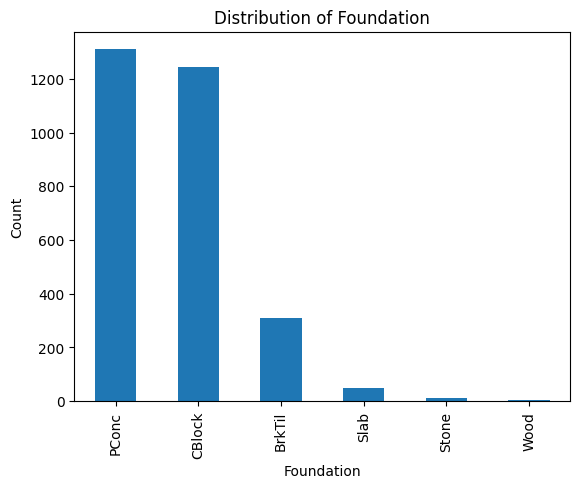

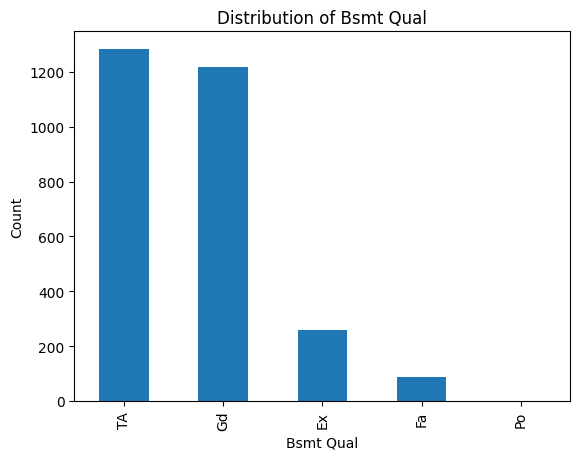

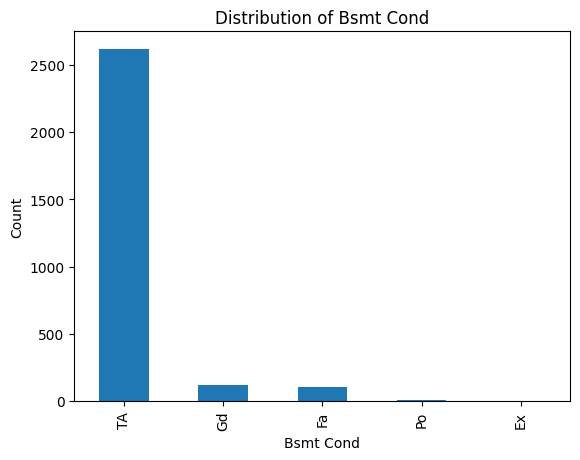

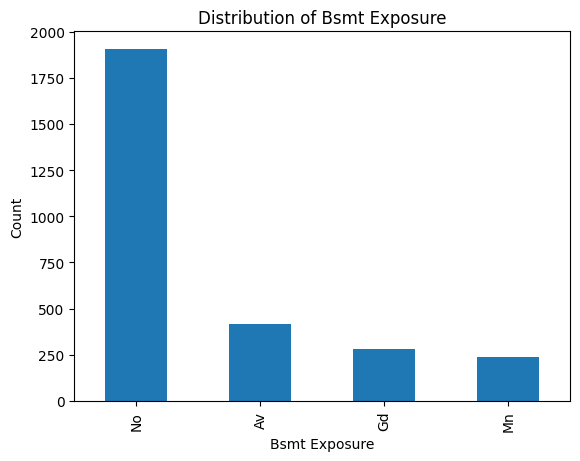

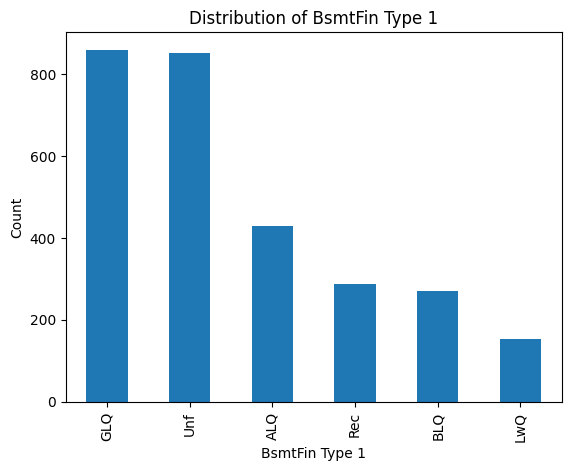

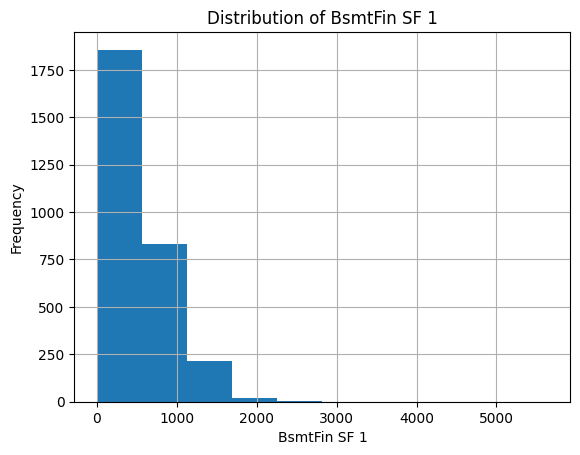

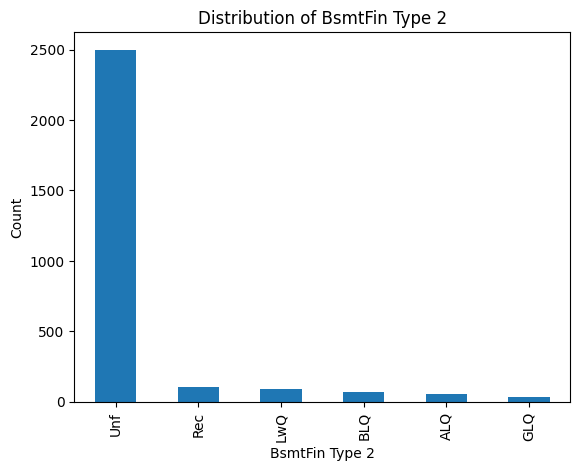

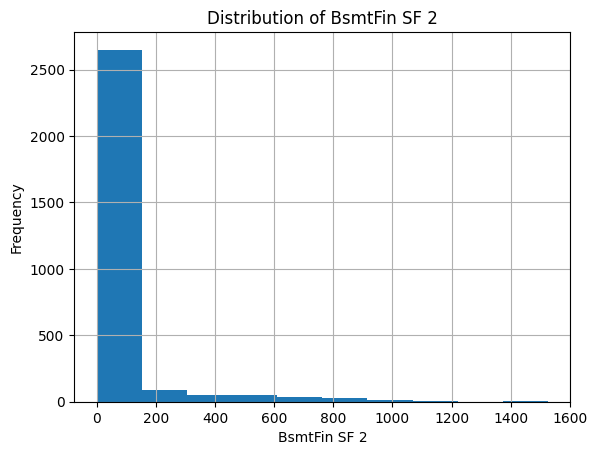

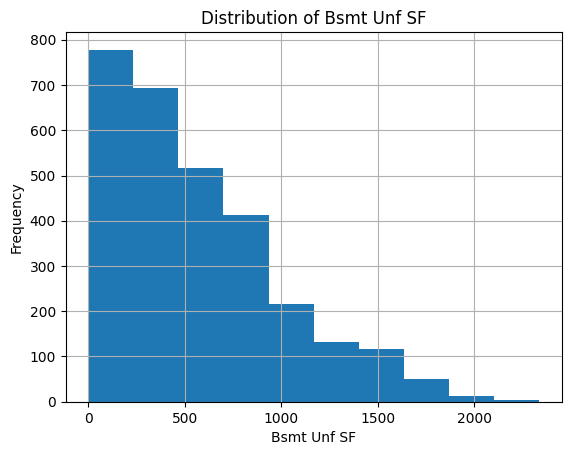

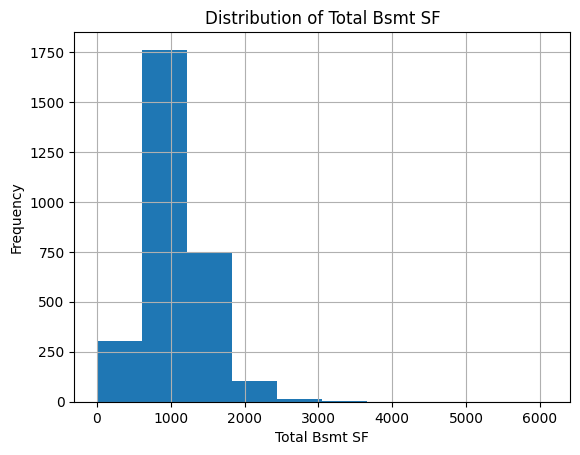

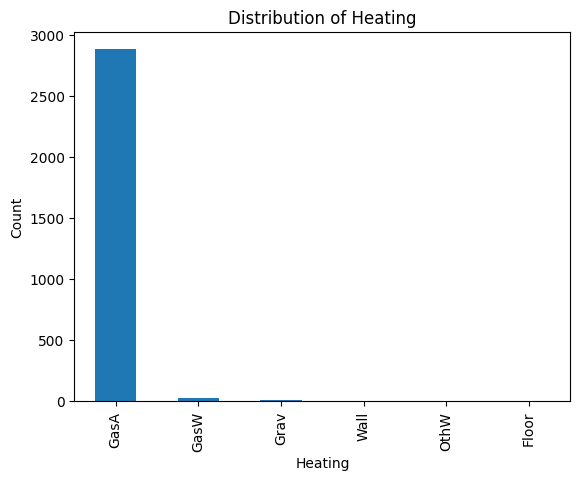

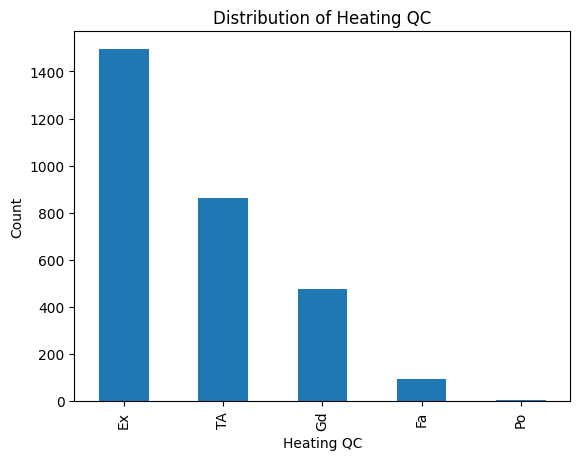

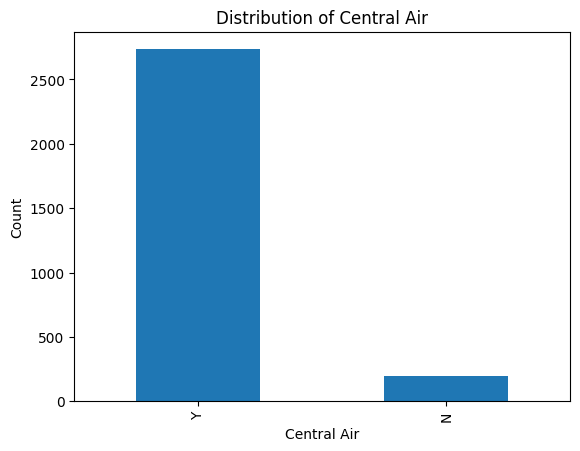

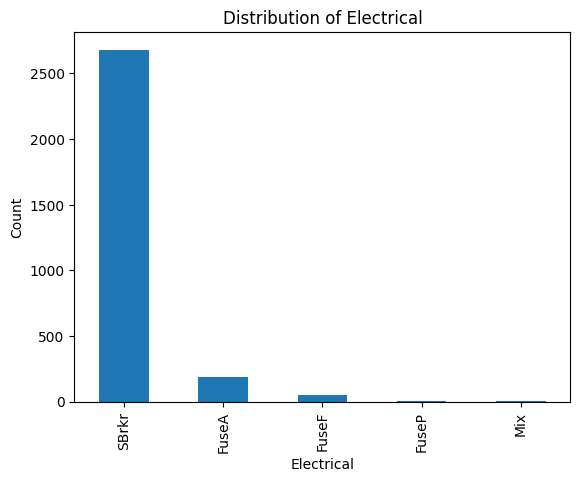

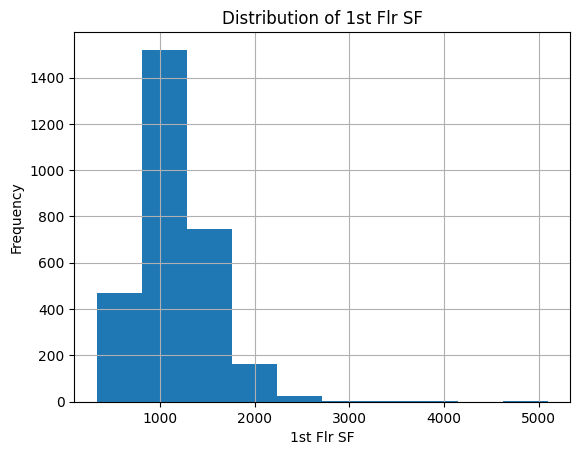

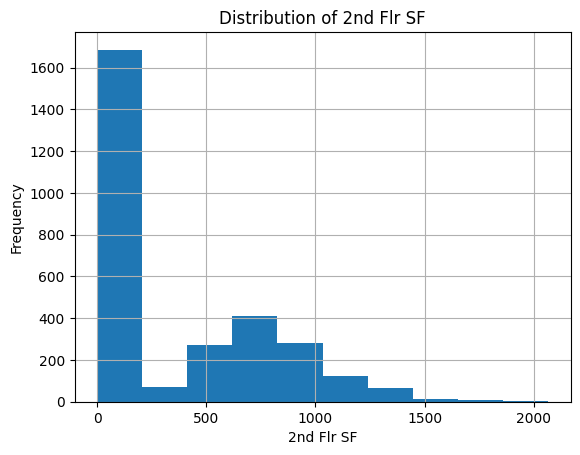

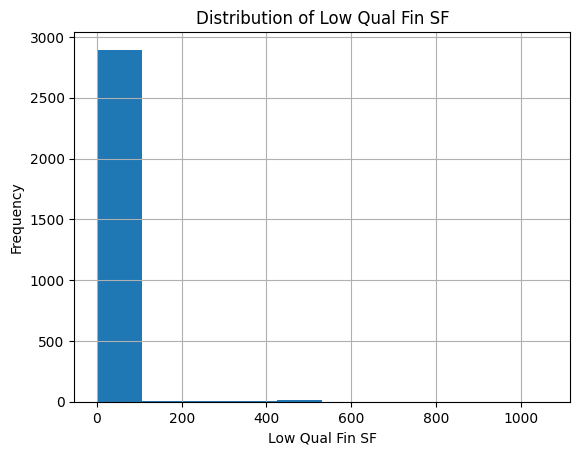

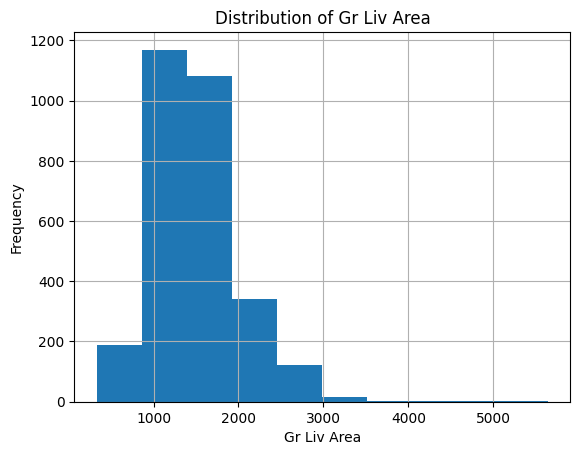

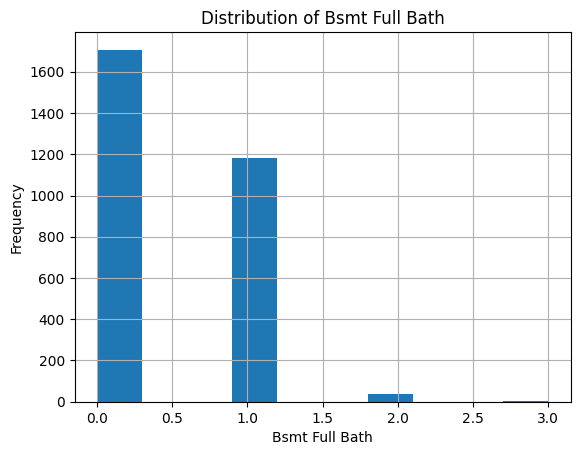

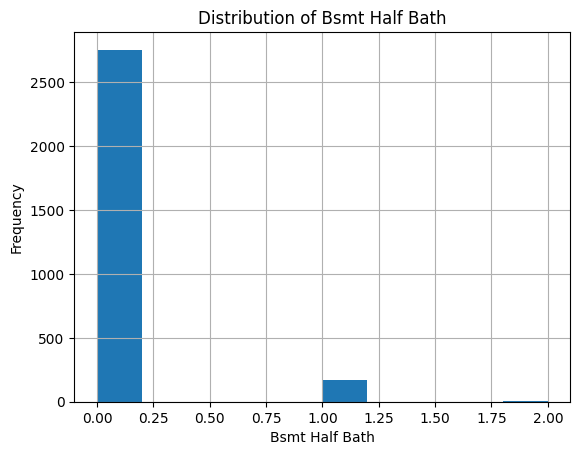

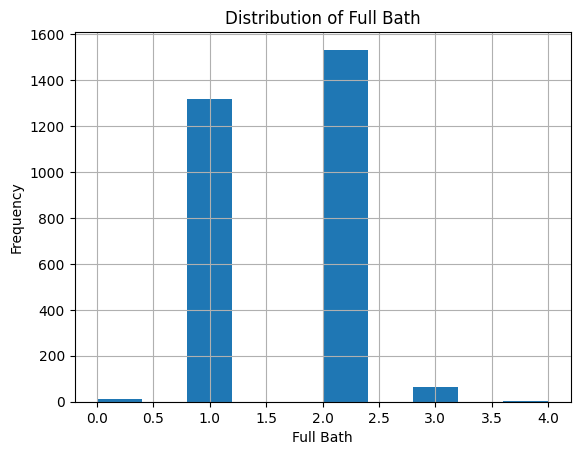

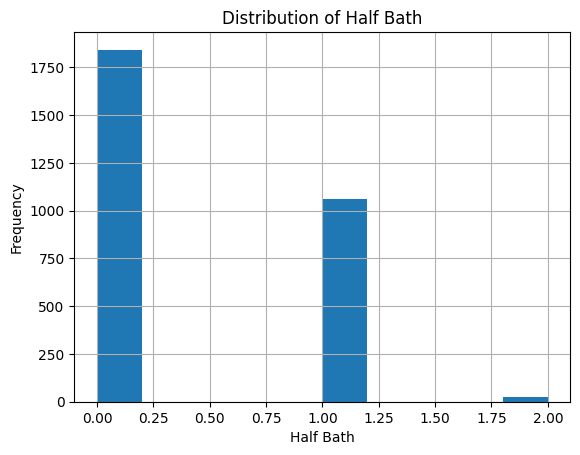

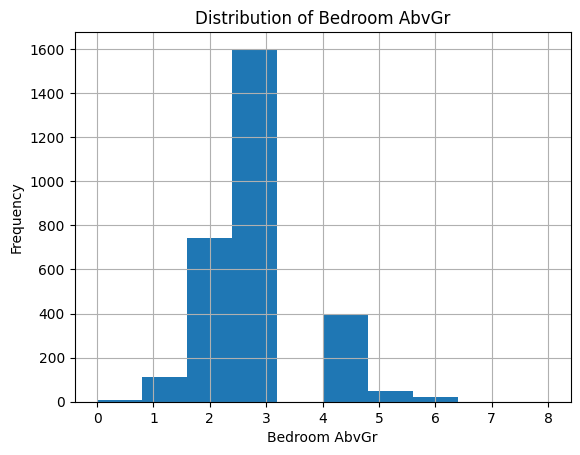

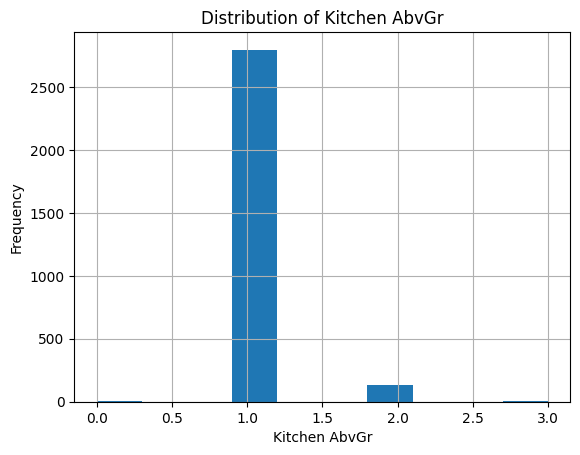

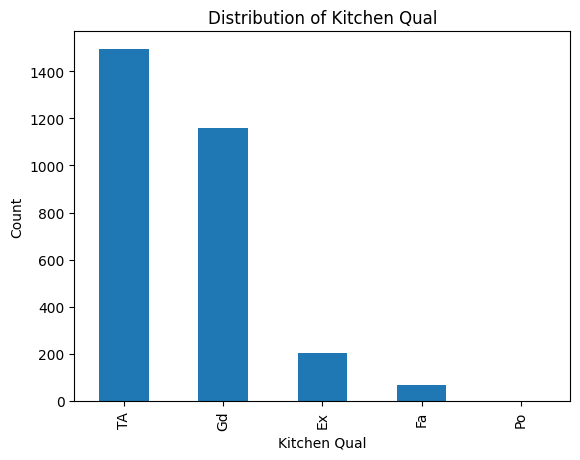

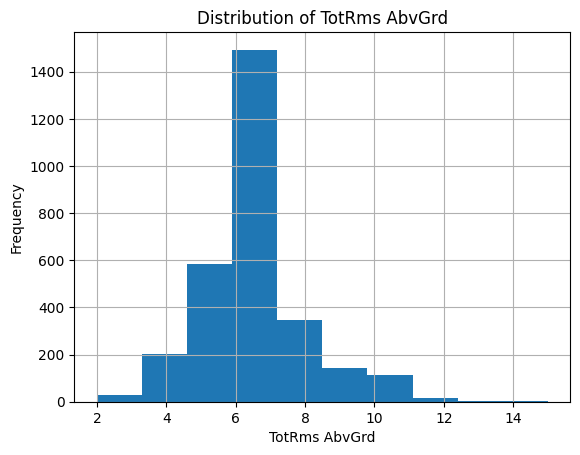

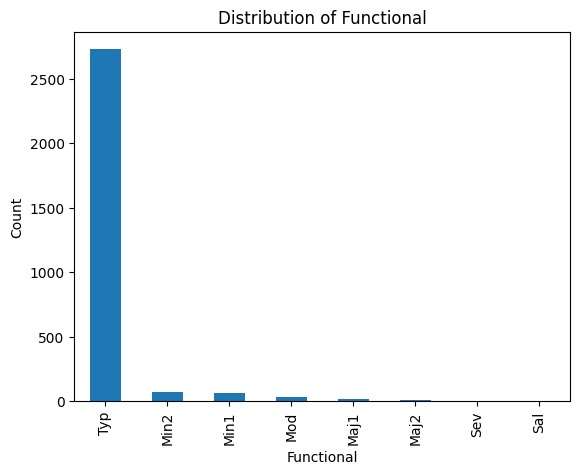

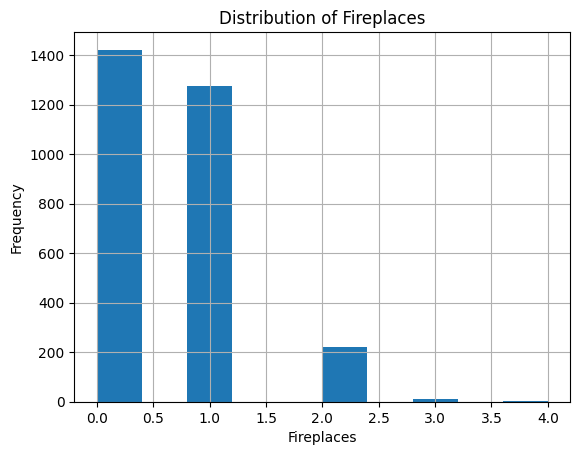

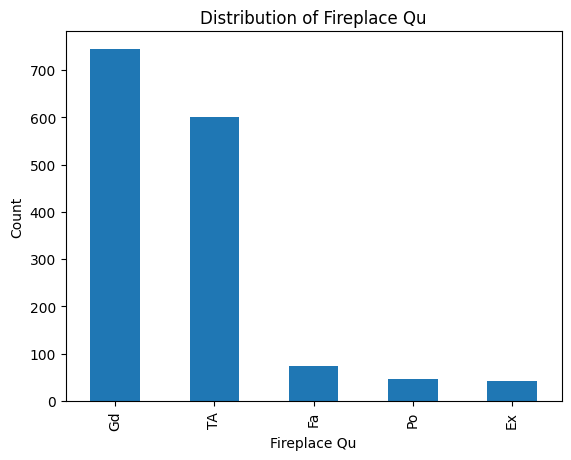

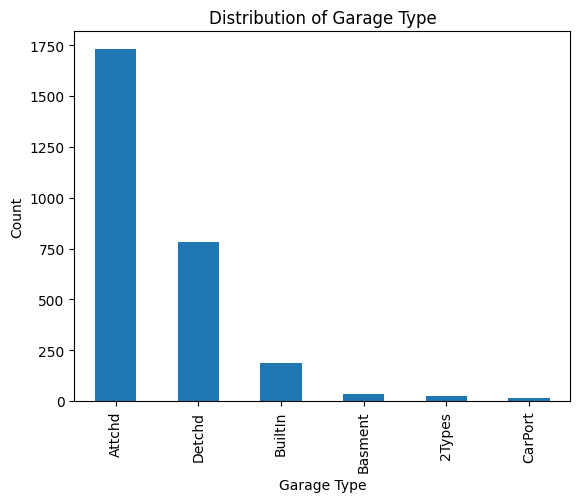

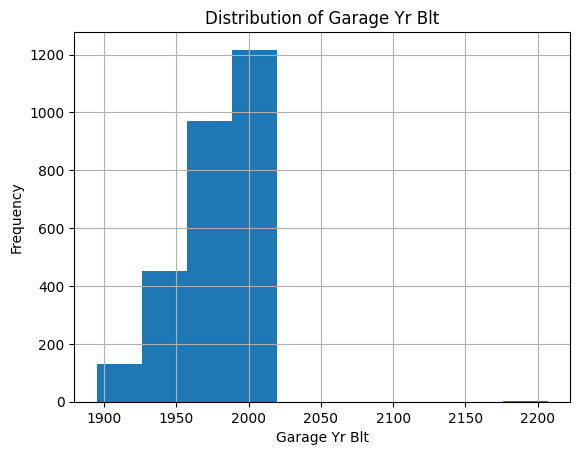

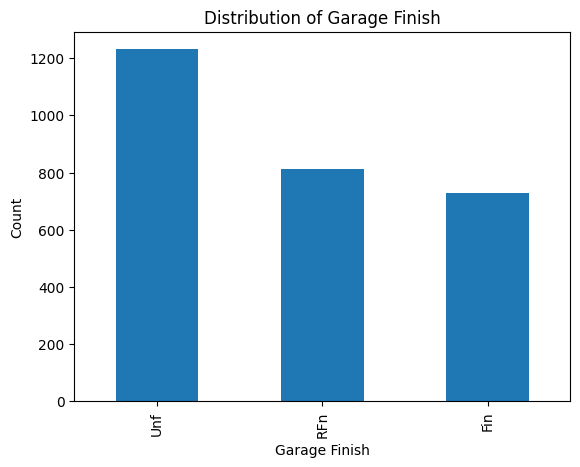

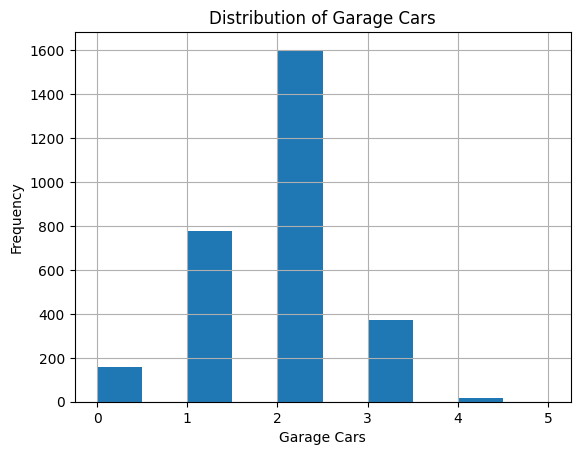

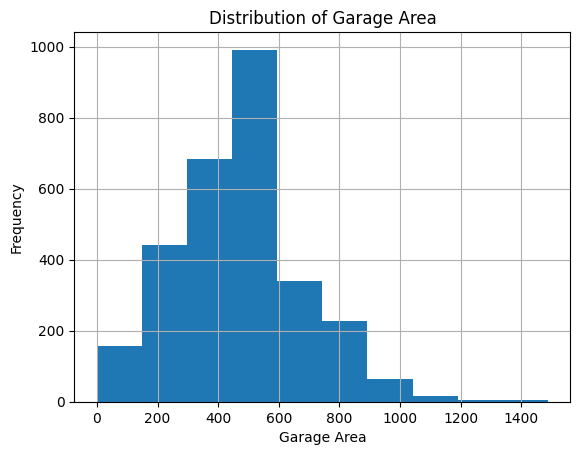

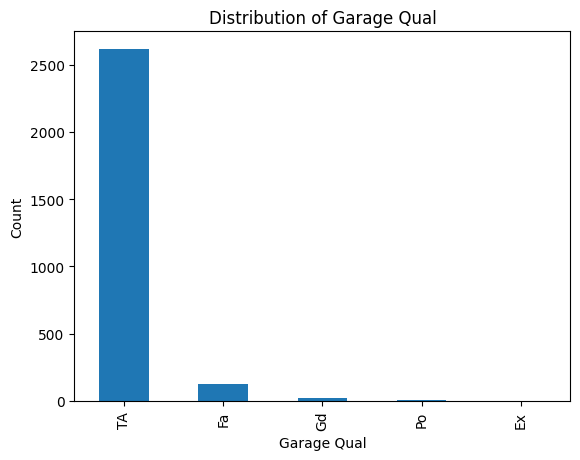

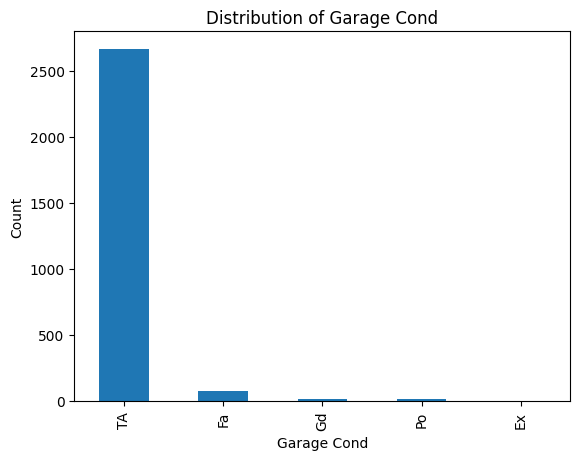

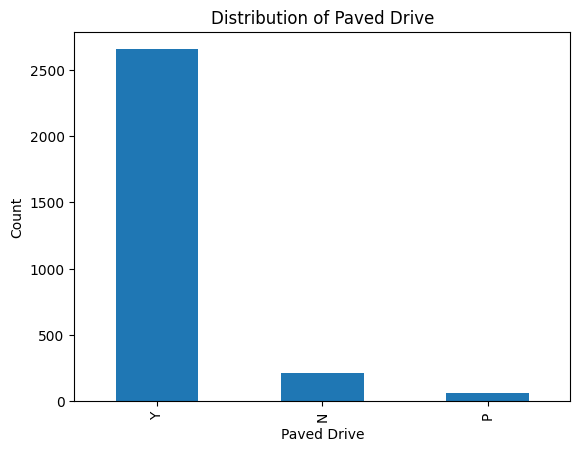

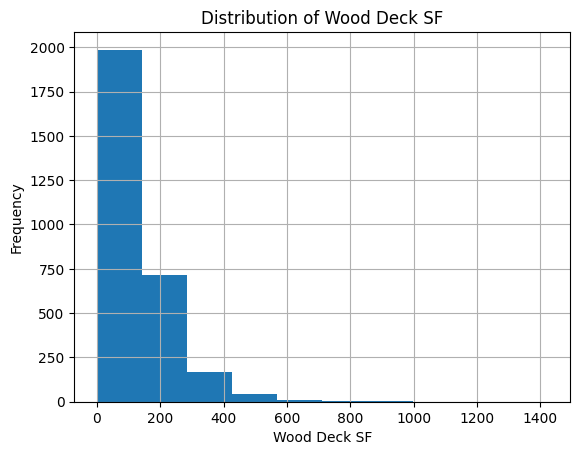

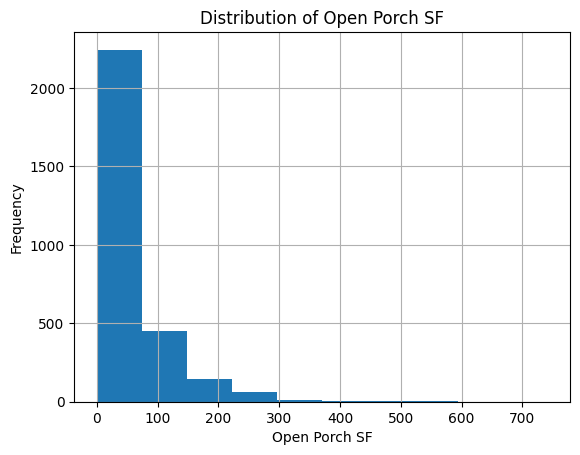

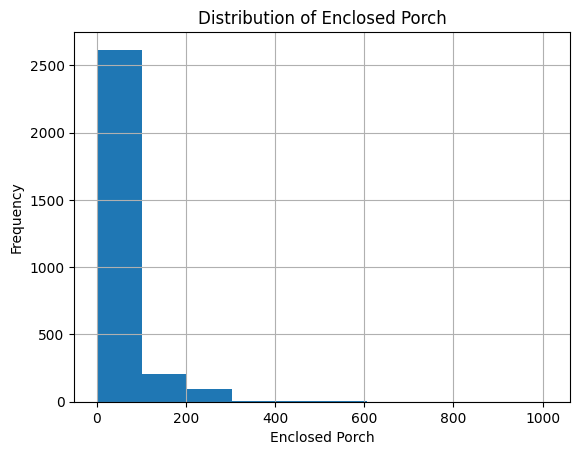

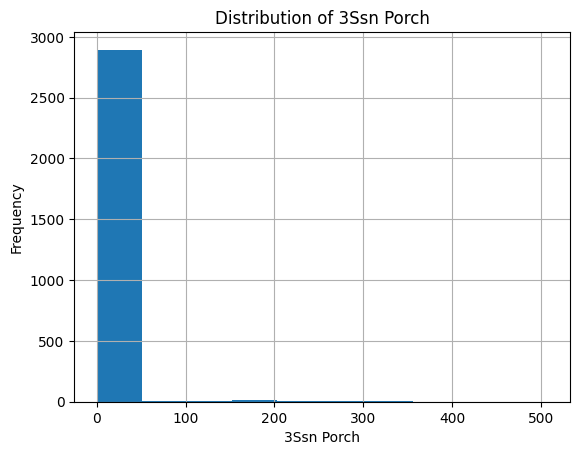

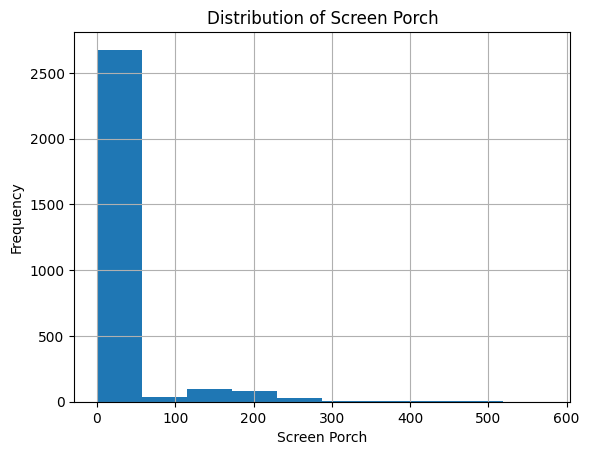

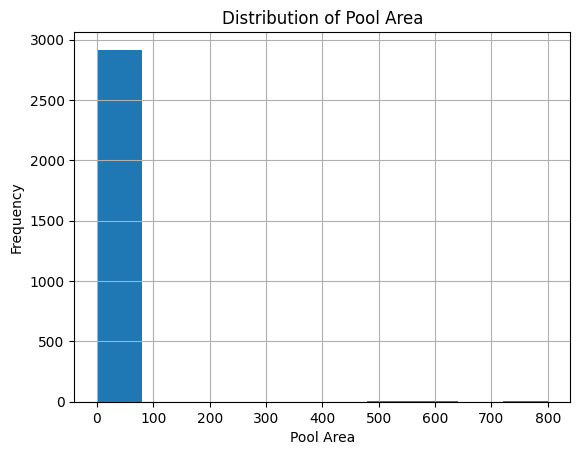

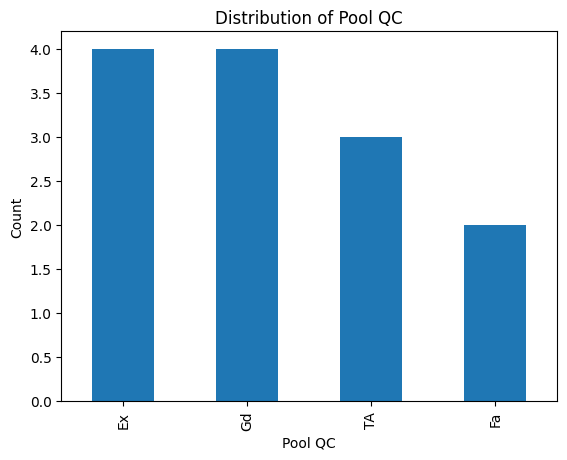

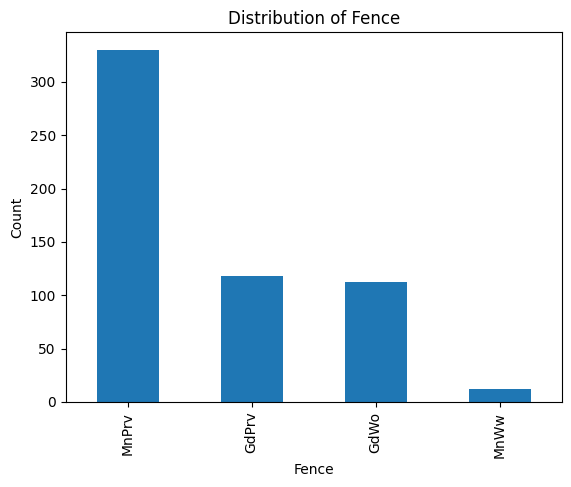

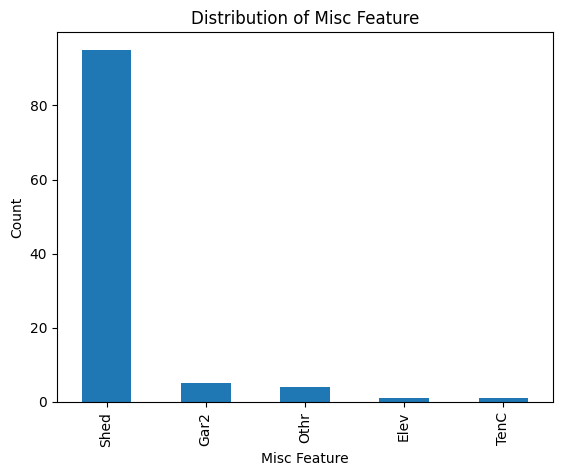

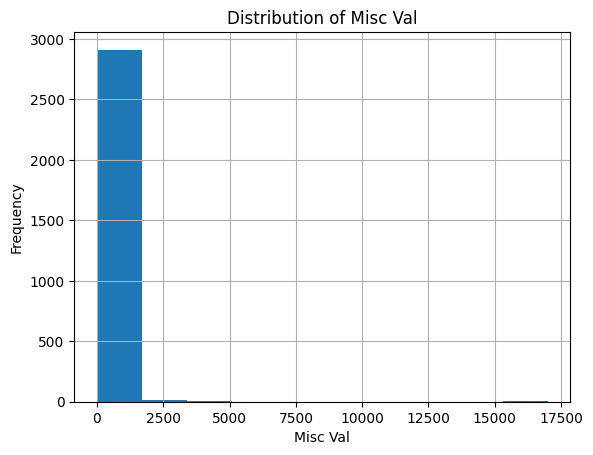

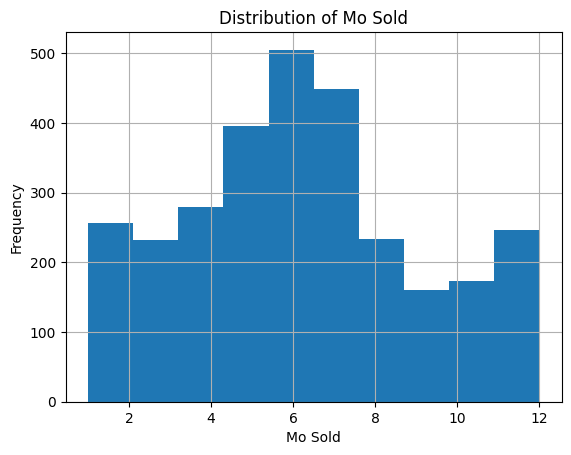

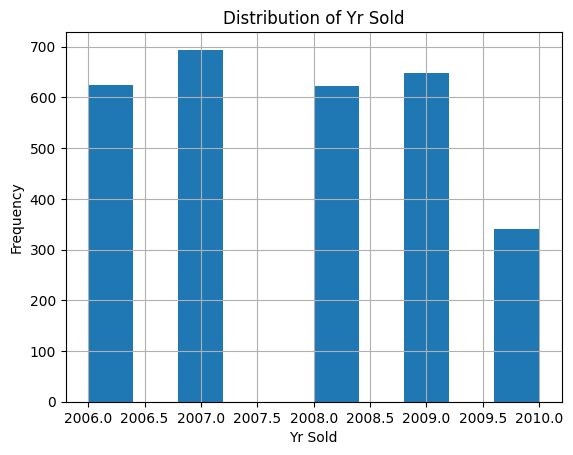

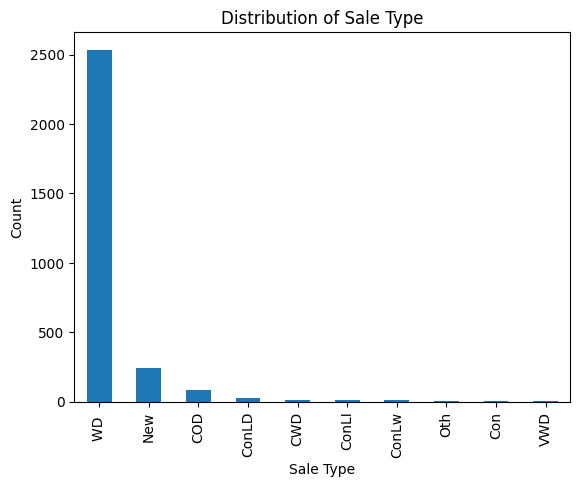

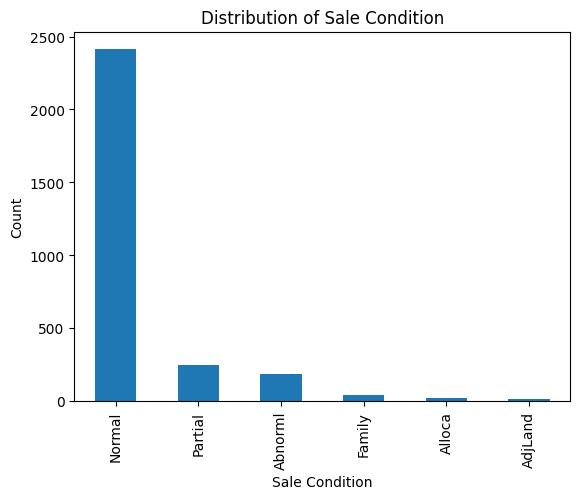

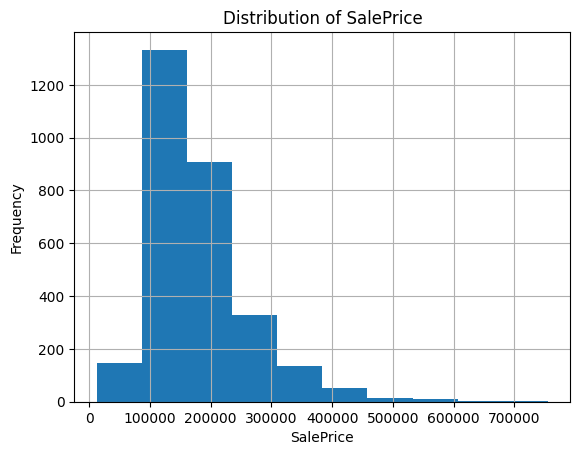

In [2]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AmesHousing.csv')

# Visualize each column
for column in df.columns:
  try:
    if df[column].dtype == 'object':
      # For categorical columns, create a bar chart
      df[column].value_counts().plot(kind='bar')
      plt.title(f'Distribution of {column}')
      plt.xlabel(column)
      plt.ylabel('Count')
      plt.show()
    else:
      # For numerical columns, create a histogram
      df[column].hist()
      plt.title(f'Distribution of {column}')
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.show()
  except Exception as e:
    print(f"Error visualizing column {column}: {e}")



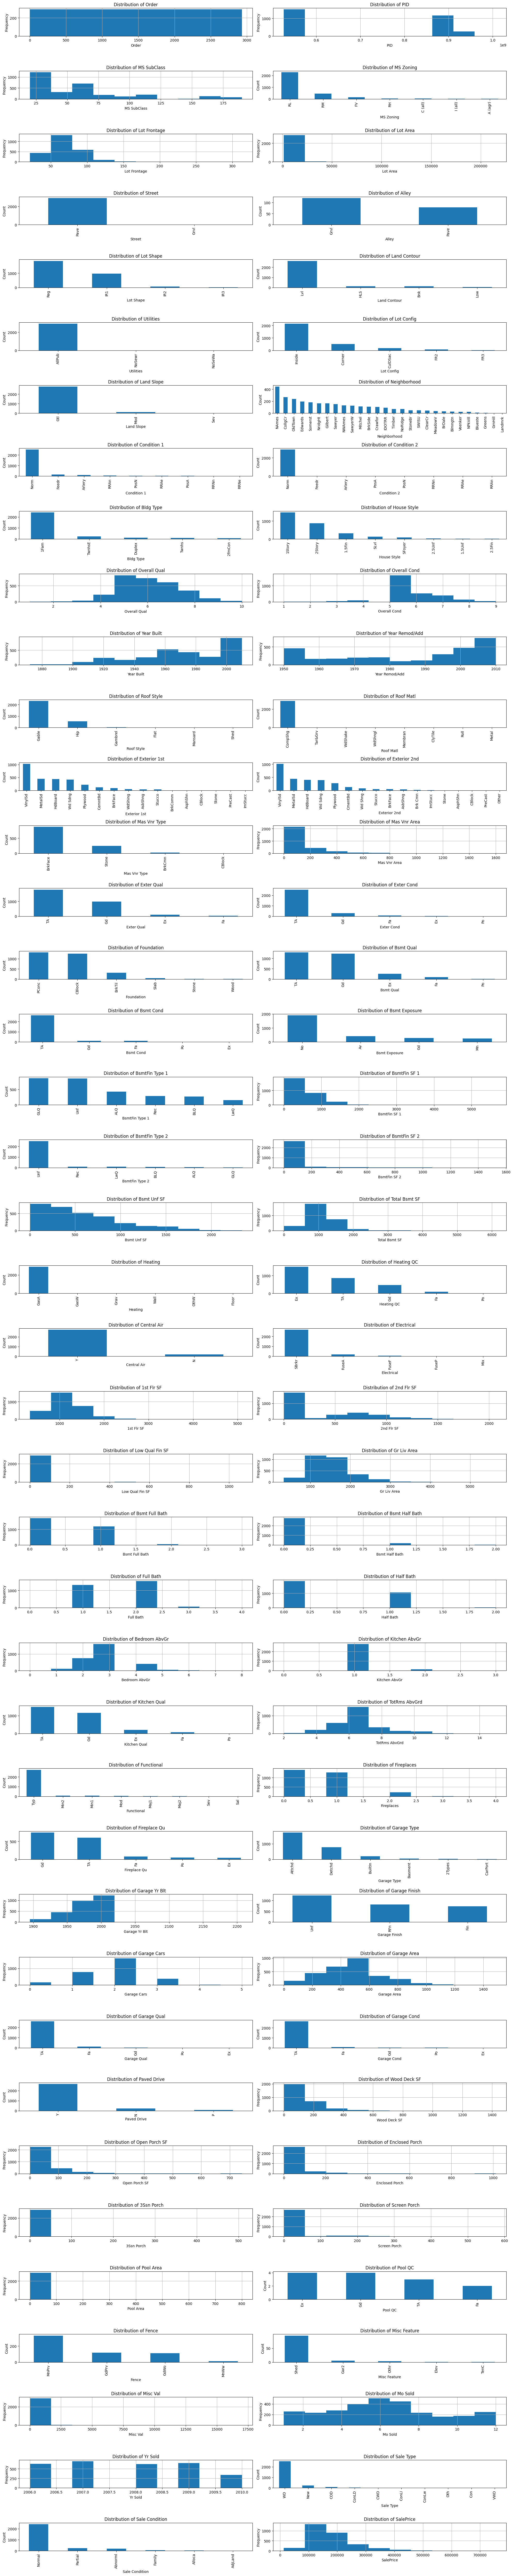

In [3]:
# prompt: code to import a csv and visulaize each column in graph in single plot like usig sub plot

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AmesHousing.csv')

# Determine the number of columns
num_cols = len(df.columns)

# Calculate the number of rows and columns for the subplot grid
num_rows = (num_cols + 1) // 2  # Round up to the nearest integer
num_cols_subplot = 2

# Create a figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(20, 100))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the columns and create visualizations
for i, column in enumerate(df.columns):
  try:
    ax = axes[i]
    if df[column].dtype == 'object':
      # For categorical columns, create a bar chart
      df[column].value_counts().plot(kind='bar', ax=ax)
      ax.set_title(f'Distribution of {column}')
      ax.set_xlabel(column)
      ax.set_ylabel('Count')
    else:
      # For numerical columns, create a histogram
      df[column].hist(ax=ax)
      ax.set_title(f'Distribution of {column}')
      ax.set_xlabel(column)
      ax.set_ylabel('Frequency')
  except Exception as e:
    print(f"Error visualizing column {column}: {e}")

# Remove any empty subplots
for i in range(num_cols, len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# It contains many features in the dataset Ameshousing.csv so our agenda is to find the right attributes for making and trainig our model so we apply feature selection and engineering techniques to find it::😁

In [10]:
df = pd.read_csv('/content/drive/MyDrive/AmesHousing.csv')
print(df.columns)
print(df['SalePrice'])

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [14]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AmesHousing.csv')

# Define numerical and categorical features
numerical_features = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', 'Pool Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
categorical_features = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

# Separate the target variable
target = df['SalePrice']
df = df.drop('SalePrice', axis=1)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# One-hot encode categorical features
onehot_encoder = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)
df_encoded = onehot_encoder.fit_transform(df)

# Convert sparse matrix back to DataFrame
df_encoded = pd.DataFrame(df_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())

# Handle missing values in df_encoded
imputer = SimpleImputer(strategy='mean')
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Select top 10 features using ANOVA F-value
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(df_encoded, target)

# Get the selected feature names
selected_features = df_encoded.columns[selector.get_support()]
print(selected_features)

Index(['onehot__Screen Porch_109', 'onehot__Screen Porch_123',
       'onehot__Screen Porch_170', 'onehot__Screen Porch_174',
       'onehot__Screen Porch_208', 'onehot__Screen Porch_217',
       'onehot__Screen Porch_260', 'onehot__Screen Porch_263',
       'onehot__Screen Porch_273', 'onehot__Misc Feature_Elev'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
